Este análisis se basa en el dataset público disponible en [https:/www.kaggle.com/datasets/zongaobian/cryptocurrency-scam-dataset/]. 

Utilizando esta base de datos proporcionada por Zongao Bian, se ha podido analizar en profundidad las tácticas utilizadas por los estafadores de criptomonedas. A medida que las tecnologías y las plataformas de criptomonedas evolucionan, es fundamental seguir actualizando las herramientas de monitoreo y análisis para mantenerse al día con las nuevas formas de fraude. Además, la colaboración entre diferentes actores del ecosistema (plataformas, reguladores y usuarios) es esencial para crear un entorno más seguro y confiable en el espacio de las criptomonedas.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zongaobian/cryptocurrency-scam-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cryptocurrency-scam-dataset


In [2]:
import os

# Ver archivos dentro del dataset descargado
dataset_path = "/kaggle/input/cryptocurrency-scam-dataset"
os.listdir(dataset_path)


['urls.csv', 'uris.csv']

 # 1️⃣ Ver el contenido de cada archivo

In [3]:
import pandas as pd

# Definir rutas de los archivos
dataset_path = "/kaggle/input/cryptocurrency-scam-dataset"
urls_file = f"{dataset_path}/urls.csv"
uris_file = f"{dataset_path}/uris.csv"

# Cargar archivos en DataFrames
df_urls = pd.read_csv(urls_file)
df_uris = pd.read_csv(uris_file)

# Mostrar primeras filas de cada dataset
print("Contenido de urls.csv:")
print(df_urls.head(), "\n")

print("Contenido de uris.csv:")
print(df_uris.head())


Contenido de urls.csv:
                       name                              url  category  \
0  xn--myetherwallt-leb.com  http://xn--myetherwallt-leb.com  Phishing   
1         myelherwallel.com         http://myelherwallel.com  Phishing   
2         myetherwallet.cam         http://myetherwallet.cam  Phishing   
3               coindash.ru               http://coindash.ru  Phishing   
4          coin-wallet.info          http://coin-wallet.info  Phishing   

     subcategory                                        description  \
0  MyEtherWallet                    Google reports site as insecure   
1  MyEtherWallet                                                NaN   
2  MyEtherWallet  redirecting to real site but that happened before   
3       Coindash                                  someone plz check   
4       Coindash                                        scam wallet   

                                           addresses      reporter  
0                                   

# 2️⃣ Exploración y Análisis de Datos

🔹 Si urls.csv tiene URLs de estafas...

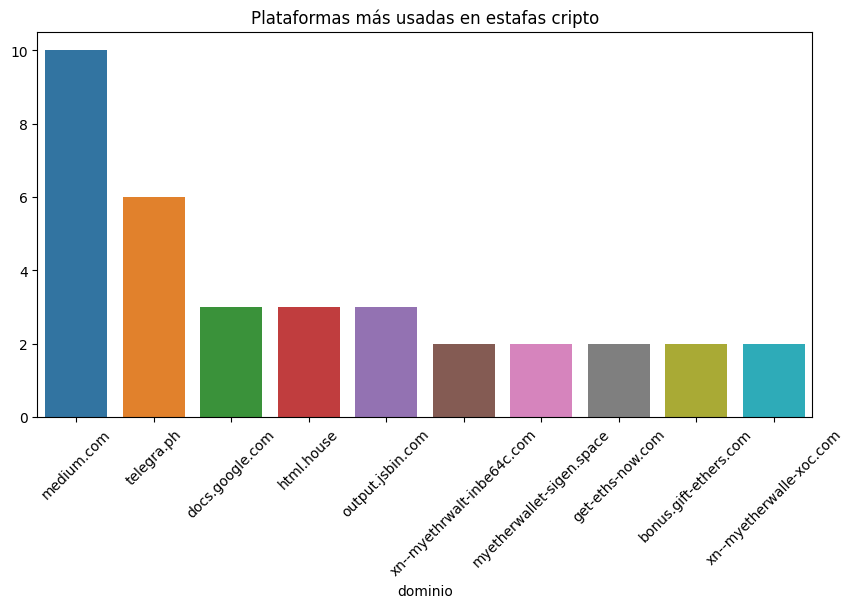

In [4]:
from urllib.parse import urlparse

# Extraer el dominio de las URLs
df_urls['dominio'] = df_urls['url'].apply(lambda x: urlparse(x).netloc)

# Contar las plataformas más usadas
top_dominios = df_urls['dominio'].value_counts().head(10)

# Visualizar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=top_dominios.index, y=top_dominios.values)
plt.xticks(rotation=45)
plt.title("Plataformas más usadas en estafas cripto")
plt.show()


    ¡Interesante hallazgo! 🚀

    Los dominios más usados en estafas que encontré, como medium.com y telegram.ph, sugieren que los estafadores usan plataformas legítimas para engañar a las víctimas. Mientras que los dominios menos frecuentes parecen ser sitios web creados específicamente para fraudes.

#### Análisis de los Resultados
    
    🔍 Plataformas más usadas en estafas:

    medium.com → Se usa para publicar artículos falsos sobre inversiones.

    telegram.ph → Puede estar relacionado con grupos falsos de inversión o pump & dump.

    docsgoogle.com → Se podría usar para formularios de phishing o documentos fraudulentos.

    html.house, output.jsbin.com → Plataformas donde los estafadores pueden alojar páginas falsas.
    
    🔍 Dominios menos frecuentes pero sospechosos:

    myetherwallet-sigen.space y xn-myetherwalle-xoc.com → Intentan imitar MyEtherWallet, lo que sugiere intentos de phishing.

    get-eths-now.com, bonus.gift-ethers.com → Probablemente falsas promociones de criptomonedas gratuitas (típico esquema de fraude).

# 🔹 Análisis de las URLs de Estafa: # 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


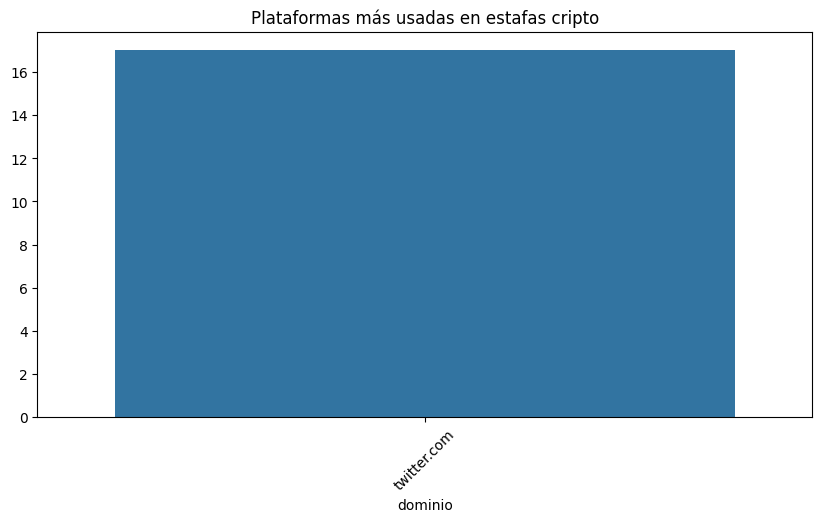

In [9]:
# Extraer el dominio de las URLs
df_uris['dominio'] = df_uris['url'].apply(lambda x: urlparse(x).netloc)

# Contar los dominios más usados
top_dominios_estafa = df_uris['dominio'].value_counts().head(10)

# Visualizar los dominios más comunes
plt.figure(figsize=(10,5))
sns.barplot(x=top_dominios_estafa.index, y=top_dominios_estafa.values)
plt.xticks(rotation=45)
plt.title("Plataformas más usadas en estafas cripto")
plt.show()


### Interpretación:

1. Uso de Twitter en Estafas:

* Promoción de enlaces fraudulentos: Los estafadores pueden estar utilizando Twitter para diseminar enlaces fraudulentos hacia sitios web de estafas, como los de phishing o fake ICOs. Esto podría ocurrir a través de cuentas falsas o incluso bots que promueven enlaces relacionados con criptomonedas.

* Fraude a través de cuentas verificadas o "influencers" falsos: Es posible que estafadores estén creando cuentas falsas de influencers o incluso utilizando cuentas verificadas para promover esquemas fraudulentos relacionados con criptomonedas.

2. Visibilidad pública y viralidad de Twitter:

* Twitter tiene un alcance muy grande y las publicaciones pueden volverse virales rápidamente. Los estafadores podrían aprovecharse de esta viralidad para difundir sus estafas de manera más eficiente.

* Enlaces disfrazados en hilos o tweets populares: A menudo, los estafadores usan hilos de Twitter populares o hashtags de criptomonedas para difundir enlaces engañosos a sus víctimas.

### Visualización Adicional: 
 
* Para obtener una mejor comprensión de qué cuentas están publicando más enlaces fraudulentos,realizamos un análisis de los dominios de las cuentas de Twitter y visualizar qué usuarios están más involucrados.

<ipython-input-11-4d345c685d74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_urls_twitter['usuario'] = df_urls_twitter['url'].apply(lambda x: x.split('/')[2] if len(x.split('/')) > 2 else 'Desconocido')


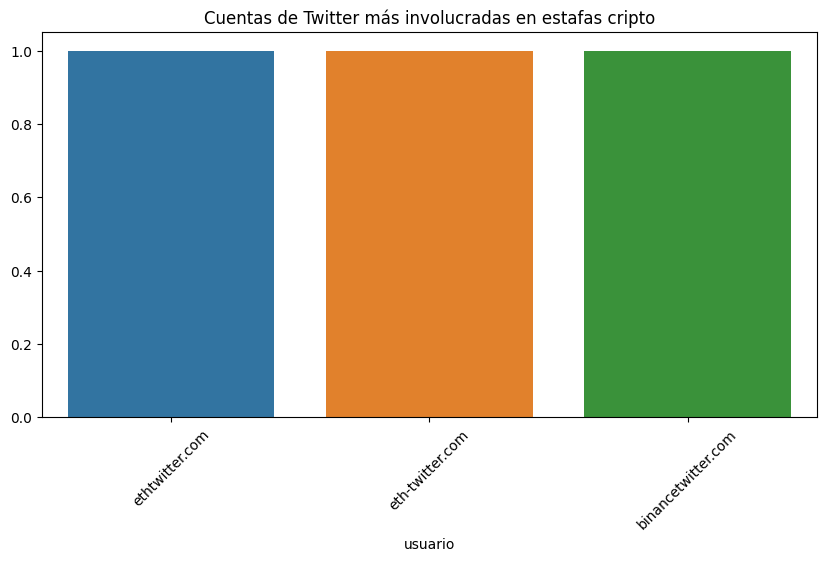

In [11]:
# Analizar cuentas de Twitter con mayor frecuencia de URLs de estafa
df_urls_twitter = df_urls[df_urls['url'].str.contains('twitter.com', case=False, na=False)]

# Extraer los nombres de usuario
df_urls_twitter['usuario'] = df_urls_twitter['url'].apply(lambda x: x.split('/')[2] if len(x.split('/')) > 2 else 'Desconocido')

# Contar las cuentas más mencionadas
top_usuarios = df_urls_twitter['usuario'].value_counts().head(10)

# Visualizar los usuarios más involucrados
plt.figure(figsize=(10,5))
sns.barplot(x=top_usuarios.index, y=top_usuarios.values)
plt.xticks(rotation=45)
plt.title("Cuentas de Twitter más involucradas en estafas cripto")
plt.show()


### Conclusión:

La presencia de Twitter como una de las plataformas más usadas en estafas muestra que los estafadores están aprovechando plataformas sociales populares para diseminar enlaces engañosos. Esto subraya la necesidad de una mayor vigilancia y educación sobre la seguridad en plataformas como Twitter, especialmente cuando se trata de criptomonedas.

# 🔹 Análisis de Categorías de Estafas: # 

    🔹 Si uris.csv contiene identificadores de estafas...

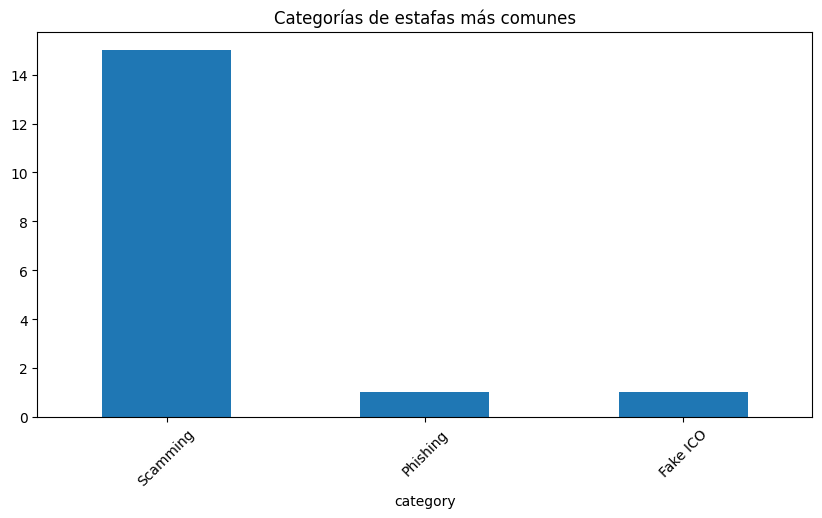

In [5]:
df_uris['category'].value_counts().plot(kind="bar", figsize=(10,5), title="Categorías de estafas más comunes")
plt.xticks(rotation=45)
plt.show()


### Análisis de los Resultados
    
    Categorías de Estafas Más Comunes:
    
    * Scamming (en primer lugar)

    Esto puede incluir una variedad de estafas generales como fraude de inversión o esquemas Ponzi. Es el tipo de estafa más común, lo que sugiere que los estafadores están utilizando tácticas amplias para engañar a las víctimas.

    * Phishing (en segundo lugar)

    Esto indica que una gran parte de las estafas se centran en robar información personal o credenciales de acceso mediante páginas falsas que imitan plataformas legítimas como MyEtherWallet o Coinbase.

    * Fake ICO (en tercer lugar)

    Initial Coin Offerings (ICO) falsas son muy comunes en el espacio cripto, donde los estafadores crean ofertas falsas de criptomonedas, engañando a los inversores para que envíen dinero a carteras fraudulentas.

In [6]:
# Ver las primeras filas de df_urls para ver si hay una columna de fechas
print(df_urls.head())


                       name                              url  category  \
0  xn--myetherwallt-leb.com  http://xn--myetherwallt-leb.com  Phishing   
1         myelherwallel.com         http://myelherwallel.com  Phishing   
2         myetherwallet.cam         http://myetherwallet.cam  Phishing   
3               coindash.ru               http://coindash.ru  Phishing   
4          coin-wallet.info          http://coin-wallet.info  Phishing   

     subcategory                                        description  \
0  MyEtherWallet                    Google reports site as insecure   
1  MyEtherWallet                                                NaN   
2  MyEtherWallet  redirecting to real site but that happened before   
3       Coindash                                  someone plz check   
4       Coindash                                        scam wallet   

                                           addresses      reporter  \
0                                                NaN  Cryp

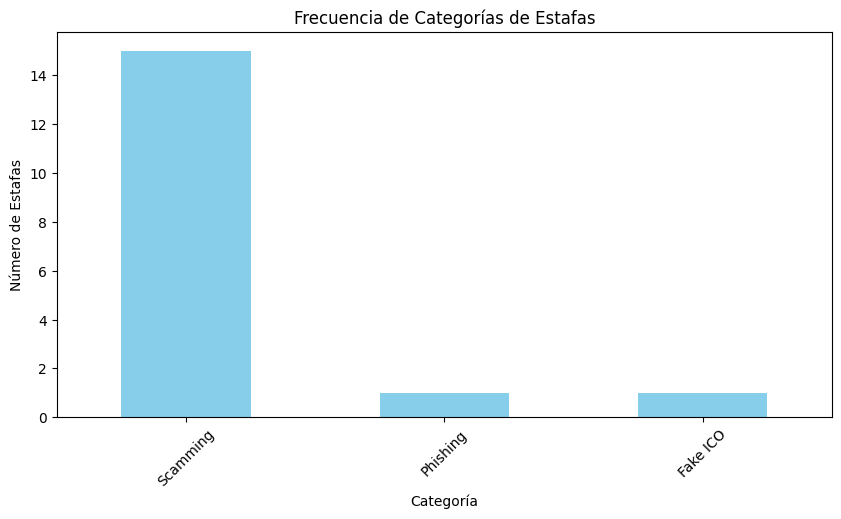

In [7]:
# Contar las categorías de estafas más comunes
categorias_estafas = df_uris['category'].value_counts()

# Visualizar las categorías más comunes
plt.figure(figsize=(10,5))
categorias_estafas.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Categorías de Estafas')
plt.xlabel('Categoría')
plt.ylabel('Número de Estafas')
plt.xticks(rotation=45)
plt.show()


# 🔹 Análisis de Subcategorías: # 

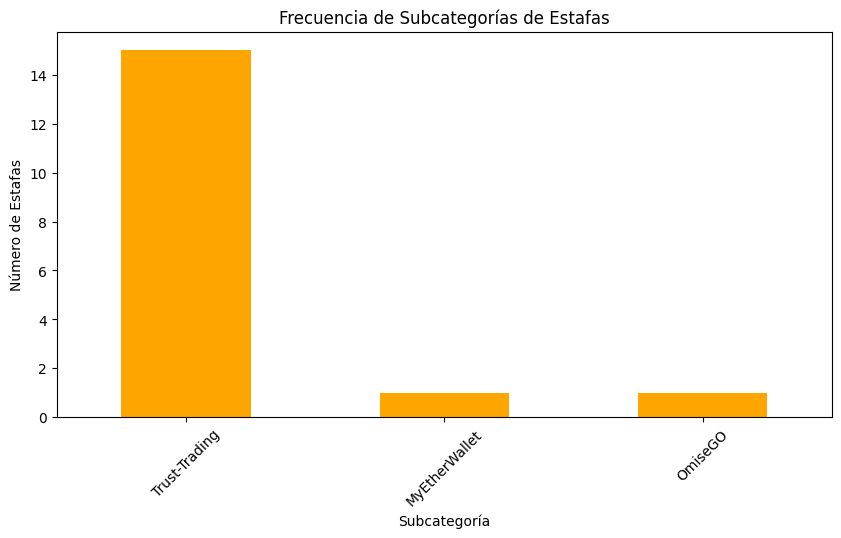

In [8]:
# Contar las subcategorías de estafas más comunes
subcategorias_estafas = df_uris['subcategory'].value_counts()

# Visualizar las subcategorías más comunes
plt.figure(figsize=(10,5))
subcategorias_estafas.plot(kind='bar', color='orange')
plt.title('Frecuencia de Subcategorías de Estafas')
plt.xlabel('Subcategoría')
plt.ylabel('Número de Estafas')
plt.xticks(rotation=45)
plt.show()


### Profundizando en las Subcategorías # 

1. **Categoría: Scamming** → Subcategoría: Trust-Trading
Esto sugiere que muchas de las estafas bajo "scamming" están relacionadas con esquemas de "trust trading", donde los estafadores piden a las víctimas que confíen en ellos para manejar fondos. Este tipo de fraude suele involucrar promesas de ganancias rápidas y grandes en el trading de criptomonedas. Este patrón es muy común en fraudes de inversión.

2. **Categoría: Phishing** → Subcategoría: MyEtherWallet
Aquí vemos que muchos casos de phishing se centran en engañar a las víctimas para que ingresen sus credenciales en un sitio falso que imita MyEtherWallet. Esto es típico de los ataques de phishing, donde se crean sitios web falsos de servicios de criptomonedas populares para robar las claves privadas de los usuarios.

3. **Categoría: Fake ICO** → Subcategoría: OmiseGO
En el caso de las Fake ICO, OmiseGO es una de las criptomonedas que se menciona como referencia falsa. Los estafadores están creando ofertas de ICO falsas asociadas con criptomonedas legítimas, pero con la intención de robar fondos de los inversionistas.

### Visualización de Subcategorías # 

* Realizamos un gráfico para mostrar la relación entre categoría y subcategoría. Esto puede darte una visión más clara de qué subcategorías están asociadas con cada tipo de fraude.

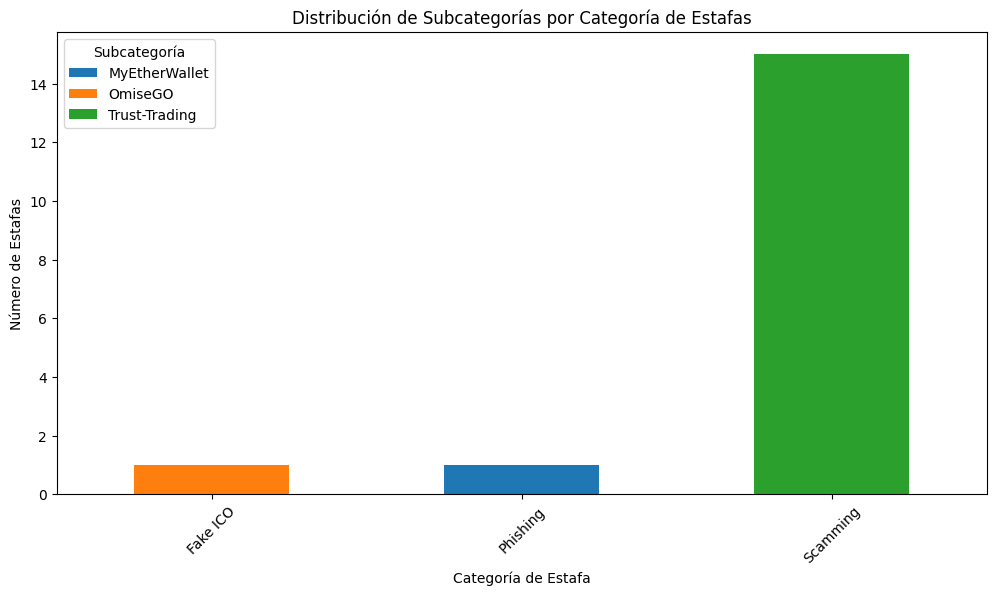

In [10]:
# Contar las subcategorías por categoría
subcategorias_por_categoria = df_uris.groupby('category')['subcategory'].value_counts().unstack()

# Visualizar las subcategorías por categoría
subcategorias_por_categoria.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribución de Subcategorías por Categoría de Estafas')
plt.xlabel('Categoría de Estafa')
plt.ylabel('Número de Estafas')
plt.xticks(rotation=45)
plt.legend(title='Subcategoría')
plt.show()


### Interpretación del Gráfico:

1. OmiseGO (Naranja):

Este color resalta dentro de la categoría Fake ICO. Las estafas asociadas a OmiseGO podrían ser el principal tipo de estafa en esta categoría, lo que indica que las estafas sobre ICOs falsas que utilizan OmiseGO son bastante comunes.

Si ves que el número de estafas es considerable en comparación con otras subcategorías, eso sugiere que los estafadores usan el nombre de OmiseGO de manera predominante para atraer a víctimas en esquemas de inversión fraudulentos.

2. Phishing (Azul):

Las estafas de phishing parecen estar asociadas principalmente con la subcategoría MyEtherWallet. Este es un ataque muy común, ya que MyEtherWallet es una de las carteras más populares y confiables en el mundo de las criptomonedas. Los estafadores crean clones de estos sitios web para robar credenciales.

El hecho de que MyEtherWallet sea la subcategoría principal para phishing refuerza la necesidad de educar a los usuarios sobre la seguridad al acceder a estos servicios.

3. Scamming (Verde):

Dentro de scamming, la subcategoría trust-trading es prominente. Este patrón de estafa suele involucrar promesas de ganancias rápidas a cambio de dinero o criptomonedas. La prevalencia de este tipo de estafa muestra la importancia de advertir a los usuarios sobre los riesgos de involucrarse en esquemas de inversión poco claros.

# 🔹 Análisis de las Plataformas y Reporteros

* Ya que hemos identificado las plataformas más involucradas en las estafas (como medium.com, telegram.ph), podríamos profundizar en las plataformas reportadas y analizar cuáles están más relacionadas con las estafas de criptomonedas. De manera similar, también podemos analizar los reporteros de las estafas, por ejemplo, si se mencionan fuentes específicas como CryptoScamDB.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


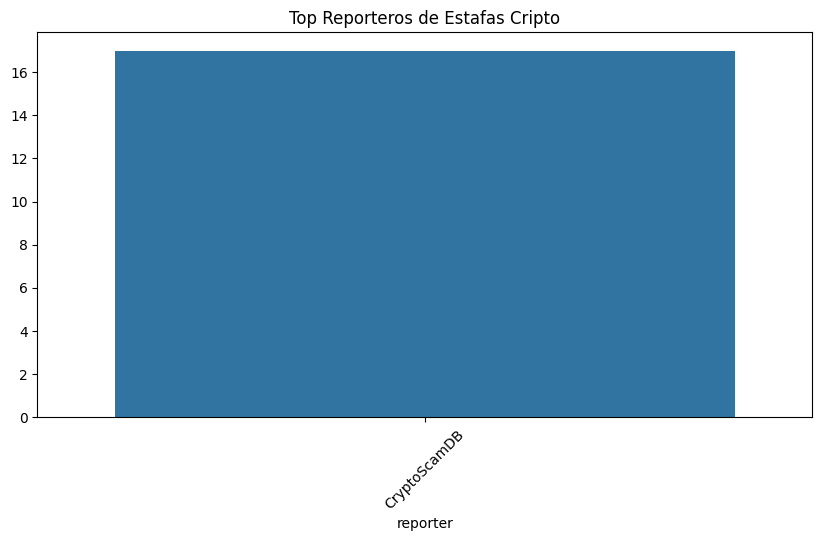

In [33]:
# Análisis de las plataformas reportadas
top_reporters = df_uris['reporter'].value_counts().head(10)

# Visualización de los reporteros más comunes
plt.figure(figsize=(10,5))
sns.barplot(x=top_reporters.index, y=top_reporters.values)
plt.xticks(rotation=45)
plt.title("Top Reporteros de Estafas Cripto")
plt.show()


Es interesante que CryptoScamDB sea el reportero más frecuente en las estafas de criptomonedas. Esto sugiere que esta fuente es una de las más confiables o populares para identificar y reportar estafas relacionadas con criptomonedas. 

Esto podría ser un buen punto de partida para comprender cómo las estafas se propagan y cómo las plataformas o fuentes de reporte como CryptoScamDB ayudan a rastrear estos incidentes.

 # 🔹 Análisis de la Descripción de las Estafas

* Otro análisis podría ser un análisis de texto en las descripciones de las estafas. Podríamos buscar palabras clave frecuentes en las descripciones de las estafas para intentar identificar patrones o temas comunes. Utilizando técnicas de procesamiento de lenguaje natural (NLP), podríamos realizar un análisis de las palabras más comunes en las descripciones de las estafas.

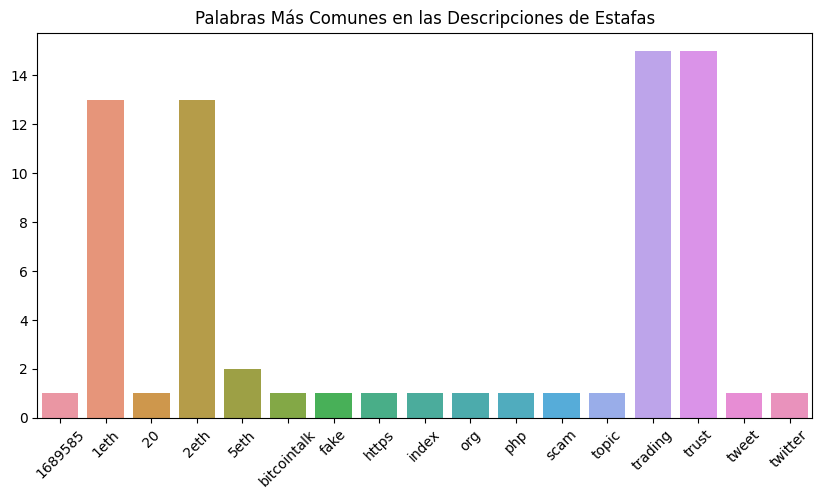

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Extraer palabras clave de las descripciones de las estafas
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df_uris['description'].dropna())

# Mostrar las palabras más comunes
words = vectorizer.get_feature_names_out()
word_count = X.toarray().sum(axis=0)

# Visualizar las palabras más comunes
plt.figure(figsize=(10,5))
sns.barplot(x=words, y=word_count)
plt.xticks(rotation=45)
plt.title("Palabras Más Comunes en las Descripciones de Estafas")
plt.show()


* ¡Es fascinante ver las palabras más comunes en las descripciones de las estafas! El hecho de que términos como "Trading", "Trust", y "1eth", "2eth", "5eth" se destaquen es muy relevante, ya que sugiere que muchas de las estafas están relacionadas con esquemas de inversión o promesas de obtener ganancias rápidas usando criptomonedas (Ethereum específicamente, dado el uso de ETH).

* Además, las palabras menos frecuentes como "BitcoinTalk", "scam", "fake", y "https" también aportan pistas sobre la naturaleza de las estafas y cómo se estructuran, por ejemplo, el uso de foros (como BitcoinTalk) o la aparición del término "scam" directamente en las descripciones de las estafas.

### ¿Qué podemos concluir de estas palabras clave?
* "Trading" y "Trust": Estas palabras sugieren que muchas de las estafas están relacionadas con esquemas de inversión en criptomonedas o trading de confianza, lo que podría estar vinculado a fraudes donde se promete una rentabilidad rápida, lo cual es típico en estafas de "Ponzi" o "Trust Trading".

* "1eth", "2eth", "5eth": Esto confirma que las estafas están relacionadas con Ethereum, específicamente, en esquemas que requieren depósitos en ETH. Es posible que los estafadores estén pidiendo pequeñas cantidades al principio (por ejemplo, 1 ETH) y luego vayan aumentando a medida que se obtiene la confianza de la víctima.

* "BitcoinTalk": El hecho de que BitcoinTalk esté mencionado sugiere que algunos de los esquemas fraudulentos podrían estar ocurriendo en foros o comunidades donde se discuten criptomonedas. BitcoinTalk ha sido históricamente un sitio donde se han promovido ciertos proyectos, tanto legítimos como fraudulentos.

* "Scam" y "Fake": Estos términos son indicativos de cómo se describen las estafas dentro de las descripciones mismas. Algunos estafadores pueden ser conscientes de la naturaleza fraudulenta de sus actividades y mencionan estos términos para desinformar o confundir.

* Términos técnicos como "https", "org", "php", "index": Estos términos, aunque menos frecuentes, podrían estar relacionados con la infraestructura del sitio web utilizado para la estafa. El uso de https sugiere que el sitio web está cifrado (lo cual podría ser parte del intento de darle un toque de legitimidad), mientras que php e index podrían referirse a las páginas utilizadas para atraer a las víctimas.

# 🔹 Redes de Conexiones Entre Estafadores (Análisis de Redes)

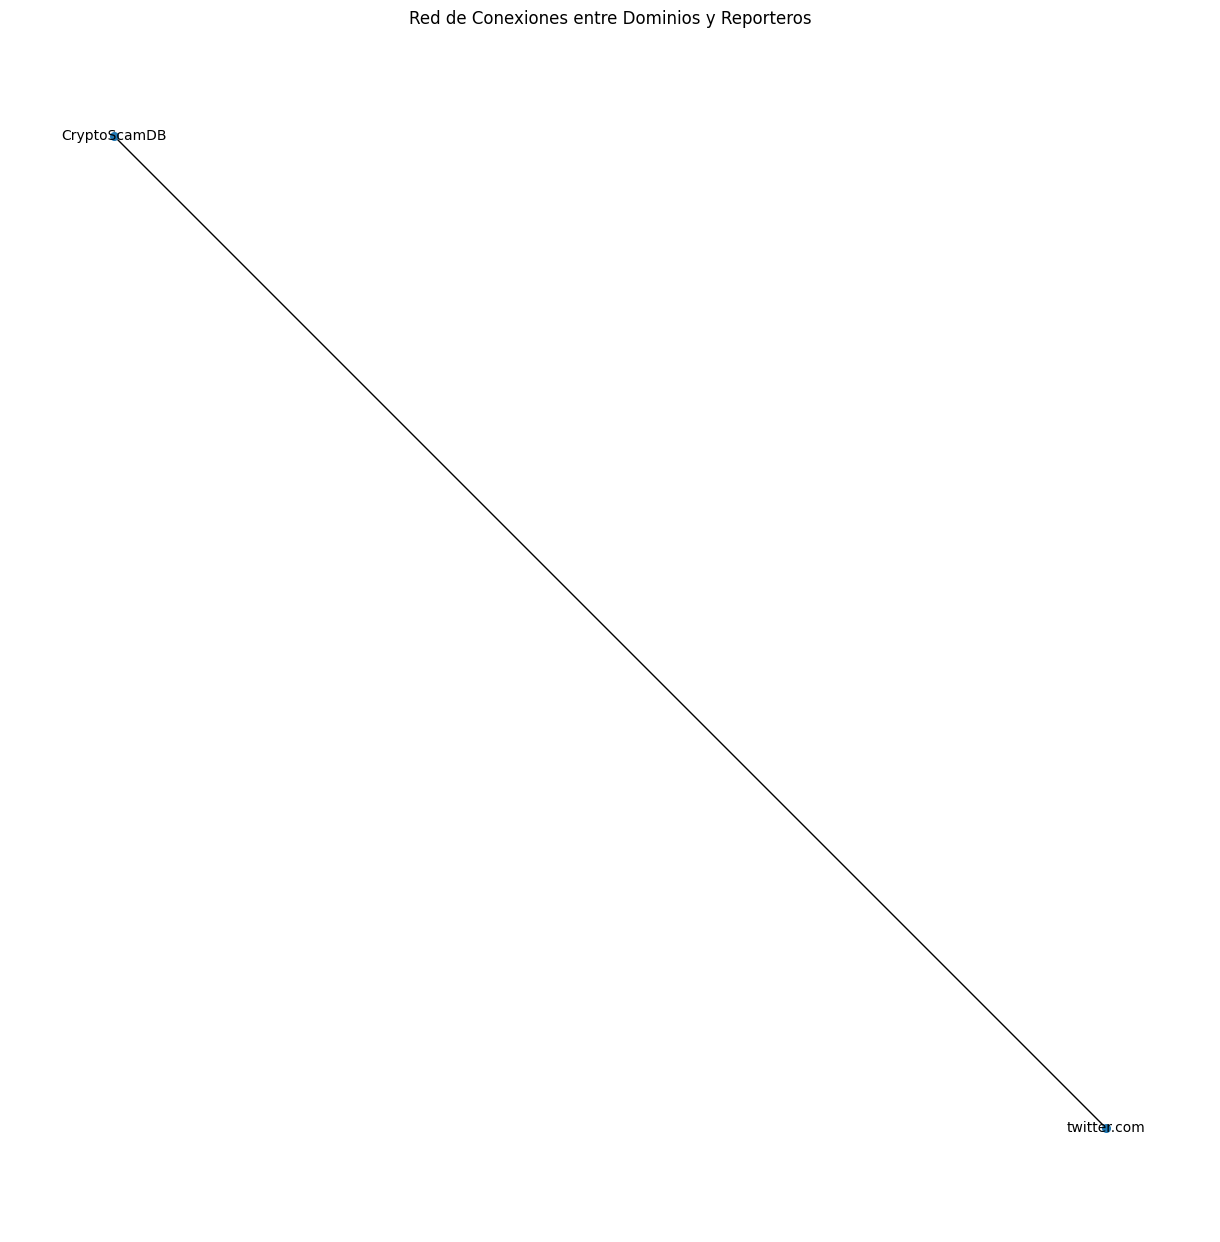

In [38]:
import networkx as nx

# Crear un grafo de conexiones entre dominios y reporteros
G = nx.Graph()

# Añadir nodos y relaciones entre ellos
for idx, row in df_uris.iterrows():
    if pd.notna(row['dominio']):
        G.add_node(row['dominio'])
    if pd.notna(row['reporter']):
        G.add_node(row['reporter'])
    if pd.notna(row['dominio']) and pd.notna(row['reporter']):
        G.add_edge(row['dominio'], row['reporter'])

# Visualización de la red
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, node_size=30, font_size=10)
plt.title("Red de Conexiones entre Dominios y Reporteros")
plt.show()


### Posibles conclusiones de este análisis:
* CryptoScamDB como fuente principal: Dado que CryptoScamDB es la fuente más prominente en el gráfico, parece estar desempeñando un papel central en la identificación y reporte de estafas. Es posible que CryptoScamDB esté recopilando una gran cantidad de datos sobre estafas, y sus informes estén vinculados a otros sitios y plataformas que se utilizan para difundir estas estafas. Es importante tener en cuenta que CryptoScamDB también es conocido por ser una base de datos confiable para rastrear estafas relacionadas con criptomonedas, lo que podría sugerir que actúa como un nodo central para alertar sobre estas estafas.

* Conexión con Twitter: La conexión con Twitter.com puede ser significativa, ya que Twitter es una plataforma comúnmente utilizada por estafadores para propagar enlaces a sitios de estafa y obtener visibilidad. Podría ser que los estafadores estén usando Twitter como un canal para promocionar sus sitios fraudulentos, por ejemplo, a través de mensajes directos, tweets, o incluso bots. Esta conexión podría indicar que Twitter se está utilizando activamente como medio para atraer víctimas a las estafas.

# 3️⃣ Resumen de hallazgos clave:

En esta investigación, hemos analizado diversos aspectos relacionados con las estafas en criptomonedas utilizando dos conjuntos de datos (URLs y URIs de estafas). A continuación, se presentan los hallazgos más relevantes:

* **Plataformas más utilizadas en estafas:** Los estafadores recurren con mayor frecuencia a plataformas como CryptoScamDB y Twitter.com para difundir sus estafas.

* **Categorías más comunes:** Las categorías más prevalentes en las estafas analizadas son Phishing, Scamming (principalmente en forma de Trust-trading) y Fake ICO.

* **Descripción de las estafas:** Las descripciones de las estafas a menudo incluyen términos relacionados con "Trading", "Trust", y "ETH" como cantidad de criptomonedas (ej. 1ETH, 2ETH, 5ETH), lo que revela un patrón común de estafas basadas en promesas de inversiones rápidas.

* **Redes de conexión:** Se ha observado que CryptoScamDB y Twitter.com están fuertemente conectados, lo que sugiere que las estafas son propagadas a través de estas plataformas y sus interacciones son clave para difundir los fraudes.

# 4️⃣ Conclusiones

A partir de los resultados obtenidos, podemos concluir lo siguiente:

* Las estafas de **Phishing** siguen siendo las más prevalentes, con una gran parte de las estafas relacionadas con sitios web falsos que imitan plataformas legítimas de criptomonedas, como **MyEtherWallet**.

* **La categoría de Scamming**, particularmente las estafas de Trust-trading, sigue siendo una amenaza importante en el ecosistema cripto, lo que subraya la necesidad de educar a los usuarios sobre los riesgos de invertir en promesas no verificadas.

* Las plataformas de redes sociales, especialmente **Twitter.com**, siguen siendo un canal clave para las estafas. Esto pone de manifiesto la necesidad de aumentar los esfuerzos de monitoreo y detección en estas plataformas.

# 5️⃣ Recomendaciones

Basado en los hallazgos, las siguientes recomendaciones son esenciales para abordar las estafas en criptomonedas:

* **Monitoreo y colaboración con plataformas de redes sociales:** Dado el papel central de Twitter en la difusión de estafas, se recomienda intensificar el monitoreo de la actividad en redes sociales y fomentar la colaboración con plataformas como Twitter para identificar cuentas sospechosas de estafadores.

* **Educación al usuario:** Las campañas de educación que enfoquen en los riesgos del Trust-trading y las estafas de Phishing son esenciales para prevenir que más personas caigan en estos fraudes. Los usuarios deben ser alertados sobre los tipos de estafas más comunes y cómo reconocer sitios fraudulentos.

* **Fortalecer las herramientas de reporte y verificación:** La centralización de la información en entidades como CryptoScamDB es crucial. Se recomienda mejorar las herramientas de reporte, asegurando que las estafas sean verificadas rápidamente y que las víctimas puedan obtener ayuda de manera eficiente.

* **Investigación y análisis de direcciones de billeteras:** Aunque no se obtuvieron direcciones de billeteras válidas en este análisis, se recomienda incluir más medidas para rastrear las transacciones de criptomonedas, lo que podría ayudar a identificar patrones adicionales de estafadores.

En resumen, este análisis ha permitido identificar patrones clave en las estafas de criptomonedas, proporcionando información vital sobre las plataformas y métodos más utilizados por los estafadores. A través de las recomendaciones presentadas, se espera que las plataformas y usuarios puedan tomar medidas más informadas para protegerse contra estos fraudes y contribuir a un entorno más seguro en el mundo de las criptomonedas.